## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [5]:
data = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")
data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


Посмотрите, какие типы данных представлены в нашем датасете

In [8]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


Теперь давайте посмотрим на столбцы с числовыми типами данных. Так мы проверим, есть ли в данных неадекватнные значения.


In [12]:
data.describe(include = [int, float]).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

In [18]:
"""
признаки isAliveMother, isAliveFather, isAliveHeir, mother, father содержат очень мало информации

"""

round(data.isna().sum()/len(data),2)

,0
name,0.00
title,0.54
male,0.00
culture,0.69
dateOfBirth,0.82
mother,0.99
father,0.99
heir,0.99
house,0.24
spouse,0.87


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

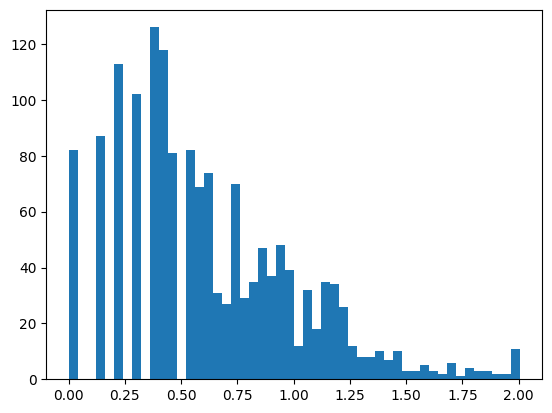

In [43]:
"""
import matplotlib.pyplot as plt
plt.hist(data["popularity"], 50)
plt.show()
"""

import matplotlib.pyplot as plt
import numpy as np

M = 1e2
plt.hist(np.log10(data["popularity"]*M+1), 50)
plt.show()

Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

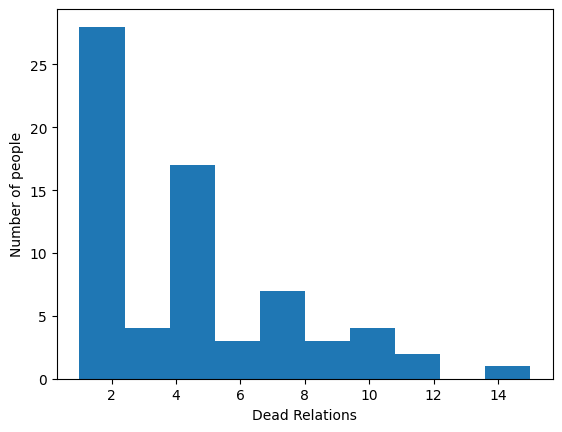

In [46]:
plt.hist(data["numDeadRelations"].loc[data["numDeadRelations"] > 0], 10)
plt.xlabel("Dead Relations")
plt.ylabel("Number of people")
plt.show()

In [51]:
data["boolDeadRelations"] = np.where(data["numDeadRelations"] > 0, 1, 0)
data.drop(columns = ["numDeadRelations"], inplace = True)
data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,popularity,isAlive,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,0.605351,0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,0.896321,1,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0.267559,1,0


Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, `age_value` принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [53]:
data['age_value'] = np.where(data['age'].notna(), data['age'], 0)

data['age_no_data'] = np.where(data['age'].isna(), 1,0)

data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,popularity,isAlive,boolDeadRelations,age_value,age_no_data
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,NaN,0.605351,0,1,0.0,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,0.896321,1,1,97.0,0
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,NaN,0.267559,1,0,0.0,1


Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [55]:
data['culture'].value_counts().head(15)

,count
culture,
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17
Reach,13


Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [57]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [ ]:
cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
      cultures_grouped_inverted.update({v:k})
cultures_grouped_inverted

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [60]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

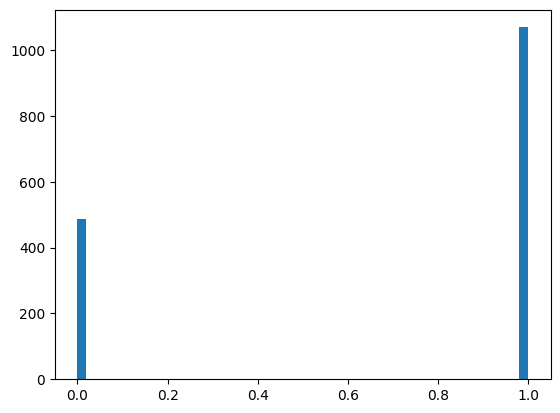

In [63]:
data['culture_no_data'] = np.where(data['culture'].isna(), 1, 0)
plt.hist(data['culture_no_data'], bins = 50)
plt.show()

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [64]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,195
male,2
culture,51
dateOfBirth,105
mother,16
father,19
heir,20
house,315
spouse,186


In [66]:
data.describe(include = [int, float]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
male,1557.0,0.0,1.0,2
dateOfBirth,279.0,-25.0,299.0,105
book1,1557.0,0.0,1.0,2
book2,1557.0,0.0,1.0,2
book3,1557.0,0.0,1.0,2
book4,1557.0,0.0,1.0,2
book5,1557.0,0.0,1.0,2
isAliveMother,18.0,0.0,1.0,2
isAliveFather,22.0,0.0,1.0,2
isAliveHeir,21.0,0.0,1.0,2


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [87]:
"""
cols_to_drop = ['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth', 'culture', 'age']
data = data.drop(columns=cols_to_drop)
"""

def simplify_title(row):
    title = row['title']
    male = row['male']

    if pd.isna(title):
        return 'Unknown'

    if 'King' in title or 'Prince' in title or 'Princess' in title:
        return 'Royal'

    if 'Lord' in title or 'Lady' in title:
        return 'Noble'

    if 'Maester' in title or 'Archmaester' in title or \
       'Septon' in title or 'Septa' in title or \
       'Commander' in title or 'Watch' in title or \
       'Ser' in title or 'Cupbearer' in title or \
       'Winterfell' in title:
        return 'Service'

    return 'Service'

data['title_simplified'] = data.apply(simplify_title, axis=1)
data = data.drop(columns = 'title')
data['culture_grouped'] = np.where(data['culture_grouped'].isna(), 'Unknown', data['culture_grouped'])
data['house'] = np.where(data['house'].isna(), 'Unknown', data['house'])


KeyError: 'title'

In [93]:
house_counts = data['house'].value_counts()
frequent_houses = house_counts[house_counts > 10].index.tolist()

data['house'] = data['house'].fillna('Unknown')
data['house'] = np.where(~data['house'].isin(frequent_houses) & (data['house'] != 'Unknown'), 'Unknown', data['house'])


In [96]:
data.isna().sum()

,0
name,0
male,0
house,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['house'] = le.fit_transform(data['house'])
data['culture_grouped'] = le.fit_transform(data['culture_grouped'])
data['title_simplified'] = le.fit_transform(data['title_simplified'])
data.head()

,name,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,isAlive,boolDeadRelations,age_value,age_no_data,culture_grouped,culture_no_data,title_simplified
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,1,13,0,0,0,0,0,0,0,0.605351,0,1,0.0,1,4,1,3
2,Walder Frey,1,3,1,1,1,1,1,1,1,0.896321,1,1,97.0,0,6,0,0
3,Addison Hill,1,13,0,0,0,1,0,0,1,0.267559,1,0,0.0,1,4,1,2
4,Aemma Arryn,0,1,0,0,0,0,0,1,1,0.183946,0,0,23.0,0,4,1,2
5,Sylva Santagar,0,13,0,0,0,1,0,1,1,0.043478,1,0,29.0,0,0,0,2


In [ ]:
data = data.drop(columns = 'name')
data.head()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

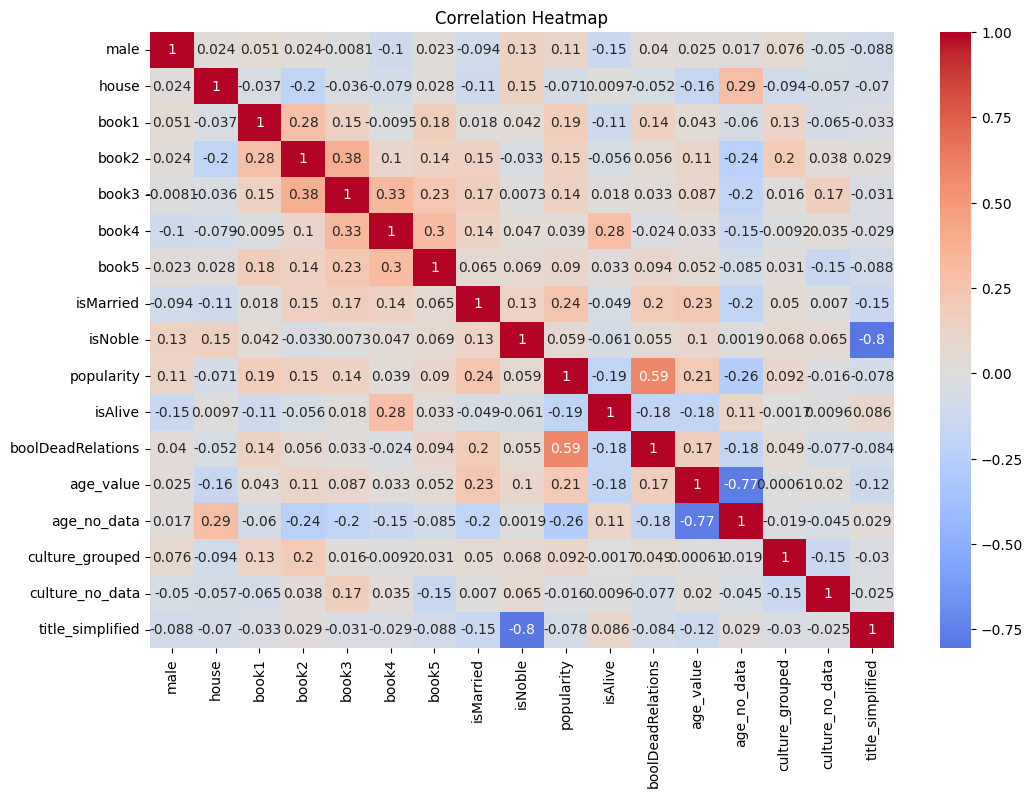

In [102]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
target_correlations = correlation_matrix['isAlive'].sort_values(ascending=False)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

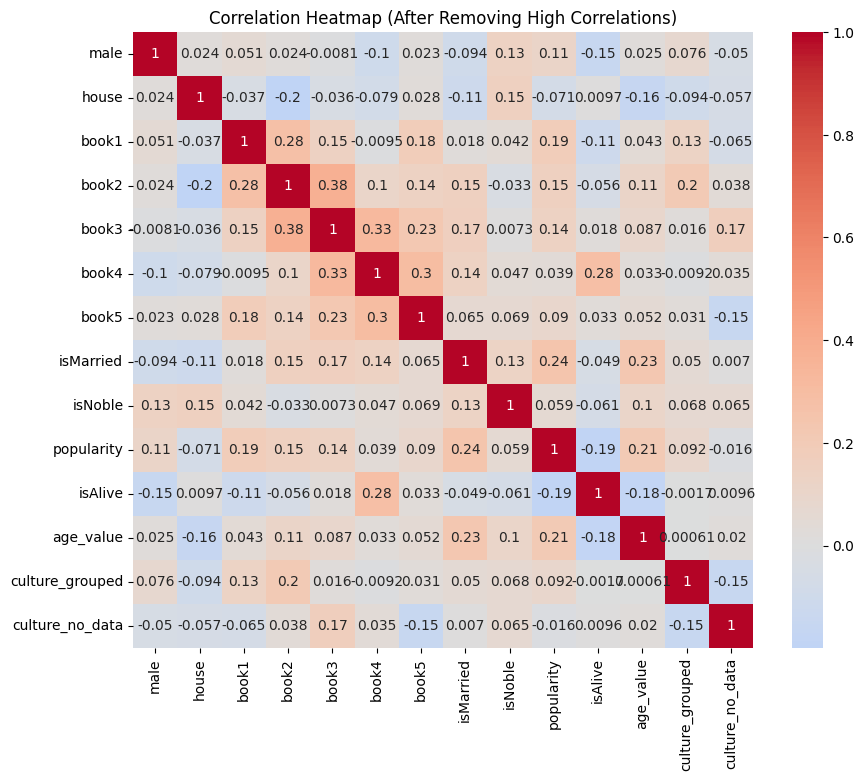

In [103]:
data_cleaned = data.drop(['age_no_data', 'title_simplified', 'boolDeadRelations'], axis=1, inplace=False)


plt.figure(figsize=(10, 8))
correlation_matrix_cleaned = data_cleaned.corr()
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (After Removing High Correlations)')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [104]:
X = data.drop(columns = ['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [105]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=52)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [107]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

## Часть 3. Оцените качество моделей

Необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [109]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [111]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7788


In [112]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, rf_pred)
print("Accuracy Random Forest: %.4f" % accuracy)

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_val)
accuracy = accuracy_score(y_val, ada_pred)
print("Accuracy AdaBoost: %.4f" % accuracy)


gpc_model = GaussianProcessClassifier()
gpc_model.fit(X_train, y_train)
gpc_pred = gpc_model.predict(X_val)
accuracy = accuracy_score(y_val, gpc_pred)
print("Accuracy GPC: %.4f" % accuracy)


gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_val)
accuracy = accuracy_score(y_val, gnb_pred)
print("Accuracy GNB: %.4f" % accuracy)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_val)
accuracy = accuracy_score(y_val, knn_pred)
print("Accuracy KNN: %.4f" % accuracy)

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_val)
accuracy = accuracy_score(y_val, svc_pred)
print("Accuracy SVC: %.4f" % accuracy)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, dt_pred)
print("Accuracy DT: %.4f" % accuracy)

Accuracy Random Forest: 0.7917
Accuracy AdaBoost: 0.8077
Accuracy GPC: 0.7660
Accuracy GNB: 0.7756
Accuracy KNN: 0.7788
Accuracy SVC: 0.7468
Accuracy DT: 0.7500


### Тестовый датасет

In [191]:
data_test = pd.read_csv("game_of_thrones_test.csv", index_col = 'S.No')

Давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [165]:
data_test["age"].describe(include = [float])

,age
count,154.000000
mean,-3701.032468
std,32736.656684
min,-298001.000000
25%,21.000000
50%,32.000000
75%,53.750000
max,100.000000


In [ ]:
#удалили выбросы
ids = data_test.loc[data_test['age'] < 0].index
data_test['age'].iloc[127] = 0
data_test['age'].iloc[131] = 0

In [193]:
data_test["boolDeadRelations"] = np.where(data_test["numDeadRelations"] > 0, 1, 0)
data_test = data_test.drop(columns = ["numDeadRelations"])

data_test['age_value'] = np.where(data_test['age'].notna(), data_test['age'], 0)
data_test['age_no_data'] = np.where(data_test['age'].isna(), 1, 0)
data_test = data_test.drop(columns = ["age"])

In [194]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}


cultures_grouped_inverted = {}
for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
      cultures_grouped_inverted.update({v:k})

data_test['culture_grouped'] = data_test['culture'].str.lower().map(cultures_grouped_inverted)
data_test['culture_no_data'] = np.where(data_test['culture'].isna(), 1, 0)

cols_to_drop = ['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'dateOfBirth', 'culture']
data_test = data_test.drop(columns=cols_to_drop)

In [195]:
data_test['culture_grouped'] = np.where(data_test['culture_grouped'].isna(), 'Unknown', data_test['culture_grouped'])


In [196]:
def simplify_title(row):
    title = row['title']
    male = row['male']

    if pd.isna(title):
        return 'Unknown'

    if 'King' in title or 'Prince' in title or 'Princess' in title:
        return 'Royal'

    if 'Lord' in title or 'Lady' in title:
        return 'Noble'

    if 'Maester' in title or 'Archmaester' in title or \
       'Septon' in title or 'Septa' in title or \
       'Commander' in title or 'Watch' in title or \
       'Ser' in title or 'Cupbearer' in title or \
       'Winterfell' in title:
        return 'Service'

    return 'Service'

In [197]:
data_test['title_simplified'] = data_test.apply(simplify_title, axis=1)
data_test = data_test.drop(columns='title')

In [198]:
data_test['house'] = np.where(data_test['house'].isna(), 'Unknown', data_test['house'])
house_counts = data_test['house'].value_counts()
frequent_houses = house_counts[house_counts > 10].index.tolist()
data_test['house'] = np.where(~data_test['house'].isin(frequent_houses) & (data_test['house'] != 'Unknown'), 'Unknown', data_test['house'])

In [199]:
le = LabelEncoder()
data_test['house'] = le.fit_transform(data_test['house'])
data_test['culture_grouped'] = le.fit_transform(data_test['culture_grouped'])
data_test['title_simplified'] = le.fit_transform(data_test['title_simplified'])

In [200]:
data_test = data_test.drop(columns = 'name')
data_test.head()

,male,house,book1,book2,book3,book4,book5,isMarried,isNoble,popularity,boolDeadRelations,age_value,age_no_data,culture_grouped,culture_no_data,title_simplified
S.No,,,,,,,,,,,,,,,,
1558,0,6,0,0,0,0,1,0,0,0.050167,0,100.0,0,4,1,3
1559,0,6,0,1,1,1,1,0,0,0.745819,0,0.0,1,1,0,3
1560,0,6,0,0,1,1,0,0,0,0.010033,0,0.0,1,4,1,3
1561,1,6,1,1,1,1,1,0,1,0.220736,0,0.0,1,4,1,2
1562,1,6,1,1,1,1,1,1,0,0.434783,0,38.0,0,6,0,3


In [207]:
ada_pred_test = ada_model.predict(data_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [208]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.71MB/s]


In [209]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [210]:
submission['isAlive'] = ada_pred_test
submission['isAlive']

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [211]:
submission.to_csv("/content/new_submission.csv", index=False)